This notebook makes a figure with a panel of three sequential interferograms (wrapped, full res) that span the largest rain storm on Dec. 7, 2018.
<br><br>
Written 4-17-24
***
***

In [1]:
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches
%matplotlib  widget

In [2]:
dir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(dir+"SLC_vh/2*")]
dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

x1 = 14000
dx = 4000
y1 = 1000
dy = 1100

j = 46
num_SLCs_to_load = 4
slcs = np.ndarray((num_SLCs_to_load,dy,dx),dtype='complex')

for i in range(num_SLCs_to_load):
    slc_date = dates[j+i]
    ds = gdal.Open(dir+"/SLC_vv/"+slc_date+"/"+slc_date+".slc.full", gdal.GA_ReadOnly)
    slcs[i] = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)
    print('loaded slc '+str(slc_date))

loaded slc 20181125
loaded slc 20181207
loaded slc 20181219
loaded slc 20181231


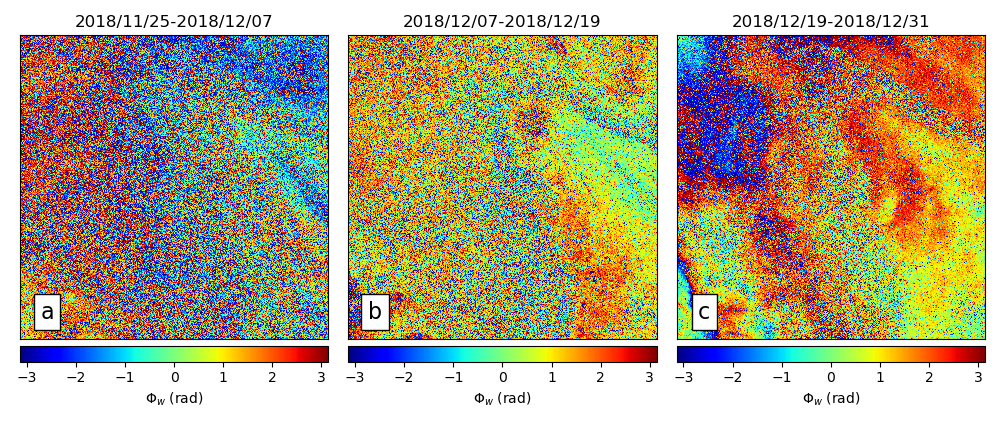

In [4]:
props = dict(boxstyle='square',facecolor='white',edgecolor='black')
plt.figure(figsize=(10,4.25),tight_layout=True)
plt.subplot(1,3,1)
plt.imshow(np.angle(slcs[0]*np.conj(slcs[1])),vmin=-np.pi,vmax=np.pi,cmap='jet',aspect='auto',interpolation='none')
plt.xlim(dx,0)
plt.xticks([]); plt.yticks([])
plt.colorbar(label='$\u03A6_{w}$ (rad)',location='bottom',pad=0.02)
plt.text(0.11,0.05,'a',fontsize=16,bbox=props,horizontalalignment='right',verticalalignment='bottom',transform=plt.gca().transAxes)
plt.title('2018/11/25-2018/12/07')
plt.subplot(1,3,2)
plt.imshow(np.angle(slcs[1]*np.conj(slcs[2])),vmin=-np.pi,vmax=np.pi,cmap='jet',aspect='auto',interpolation='none')
plt.xlim(dx,0)
plt.xticks([]); plt.yticks([])
plt.colorbar(label='$\u03A6_{w}$ (rad)',location='bottom',pad=0.02)
plt.text(0.11,0.05,'b',fontsize=16,bbox=props,horizontalalignment='right',verticalalignment='bottom',transform=plt.gca().transAxes)
plt.title('2018/12/07-2018/12/19')
plt.subplot(1,3,3)
plt.imshow(np.angle(slcs[2]*np.conj(slcs[3])),vmin=-np.pi,vmax=np.pi,cmap='jet',aspect='auto',interpolation='none')
plt.xlim(dx,0)
plt.xticks([]); plt.yticks([])
plt.colorbar(label='$\u03A6_{w}$ (rad)',location='bottom',pad=0.02)
plt.text(0.11,0.05,'c',fontsize=16,bbox=props,horizontalalignment='right',verticalalignment='bottom',transform=plt.gca().transAxes)
plt.title('2018/12/19-2018/12/31')
plt.show()